# Surprise Housing -Assignment Solution

# 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV




import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
data = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/9cefd607-bbb7-443d-bb3e-eac9fef04453/train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# number of observations: 1460
data.shape

(1460, 81)

In [5]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Inspect the different columsn in the dataset
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Cleaning

In [8]:
# Getting the number of missing values in each column
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [9]:
# Getting the percentages of missing values in each coloumn
((data.isnull().sum()* 100) / len(data.index),2)

(Id                0.000000
 MSSubClass        0.000000
 MSZoning          0.000000
 LotFrontage      17.739726
 LotArea           0.000000
 Street            0.000000
 Alley            93.767123
 LotShape          0.000000
 LandContour       0.000000
 Utilities         0.000000
 LotConfig         0.000000
 LandSlope         0.000000
 Neighborhood      0.000000
 Condition1        0.000000
 Condition2        0.000000
 BldgType          0.000000
 HouseStyle        0.000000
 OverallQual       0.000000
 OverallCond       0.000000
 YearBuilt         0.000000
 YearRemodAdd      0.000000
 RoofStyle         0.000000
 RoofMatl          0.000000
 Exterior1st       0.000000
 Exterior2nd       0.000000
 MasVnrType        0.547945
 MasVnrArea        0.547945
 ExterQual         0.000000
 ExterCond         0.000000
 Foundation        0.000000
                    ...    
 BedroomAbvGr      0.000000
 KitchenAbvGr      0.000000
 KitchenQual       0.000000
 TotRmsAbvGrd      0.000000
 Functional        0

## Missing values imputation

In [10]:
# Alley have NA as No alley access but NA cant be a sub-category 
data['Alley'] = data['Alley'].replace(np.nan, 'No alley access')

In [11]:
# BsmtQual have NA as No Basement but NA cant be a sub-category 
data['BsmtQual'] = data['BsmtQual'].replace(np.nan, 'No Basement')

In [12]:
# BsmtCond have NA as No Basement but NA cant be a sub-category 
data['BsmtCond'] = data['BsmtCond'].replace(np.nan, 'No Basement')

In [13]:
# BsmtExposure have NA as No Basement but NA cant be a sub-category 
data['BsmtExposure'] = data['BsmtExposure'].replace(np.nan, 'No Basement')

In [14]:
# BsmtFinType1 have NA as No Basement but NA cant be a sub-category 
data['BsmtFinType1'] = data['BsmtFinType1'].replace(np.nan, 'No Basement')

In [15]:
# BsmtFinType2 have NA as No Basement but NA cant be a sub-category 
data['BsmtFinType2'] = data['BsmtFinType2'].replace(np.nan, 'No Basement')

In [16]:
# FireplaceQu  have NA as No Fireplace but NA cant be a sub-category 
data['FireplaceQu'] = data['FireplaceQu'].replace(np.nan, 'No Fireplace')

In [17]:
# GarageType  have NA as No Garage but NA cant be a sub-category 
data['GarageType'] = data['GarageType'].replace(np.nan, 'No Garage')

In [18]:
# GarageFinish have NA as No Garage but NA cant be a sub-category 
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'No Garage')

In [19]:
# GarageQual have NA as No Garage but NA cant be a sub-category 
data['GarageQual'] = data['GarageQual'].replace(np.nan, 'No Garage')

In [20]:
# GarageCond have NA as No Garage but NA cant be a sub-category 
data['GarageCond'] = data['GarageCond'].replace(np.nan, 'No Garage')

In [21]:
# PoolQC have NA as No Pool but NA cant be a sub-category 
data['PoolQC'] = data['PoolQC'].replace(np.nan, 'No Pool')

In [22]:
# Fence have NA as No Fence but NA cant be a sub-category 
data['Fence'] = data['Fence'].replace(np.nan, 'No Fence')

In [23]:
# MiscFeature have NA as None but NA cant be a sub-category 
data['MiscFeature'] = data['MiscFeature'].replace(np.nan, 'None')

In [24]:
# GarageYrBlt have NA as None but NA cant be a sub-category 
data['GarageYrBlt'] = data['GarageYrBlt'].replace(np.nan,0)

In [25]:
# LotFrontage have NA as None but NA cant be a sub-category 
data['LotFrontage']=data['LotFrontage'].replace(np.nan,0)

In [26]:
#there is one missing value for Electrical
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

In [27]:
# inputting o and none for na
data['MasVnrArea'].fillna(0, inplace=True)
data['MasVnrType'].fillna("None", inplace=True)

In [28]:
#checking for missing values in dataset
data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

# Exploratory Data Analysis

## Correlation

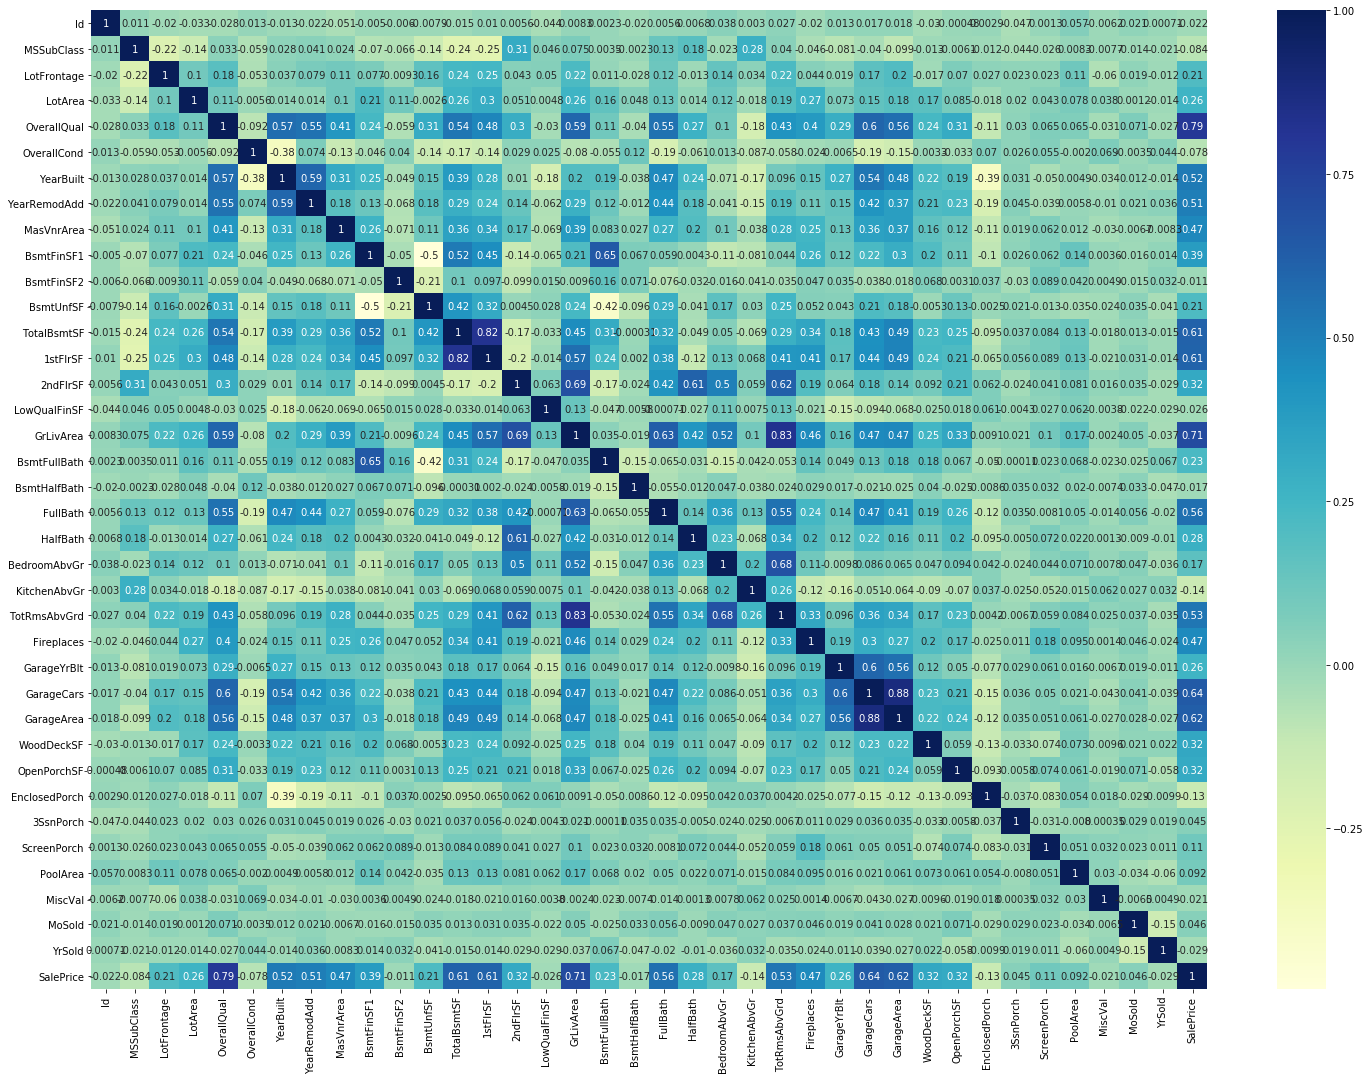

In [29]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,18))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

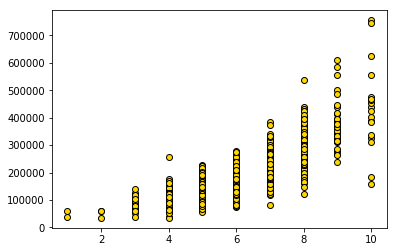

In [30]:
#OverallQual is most correlated (79%) variable with saleprice
plt.scatter(x=data['OverallQual'],y=data['SalePrice'], edgecolors='#000000',color='gold')

OverallQual is divided into categories from 1 to 10 so there is no outlier values 

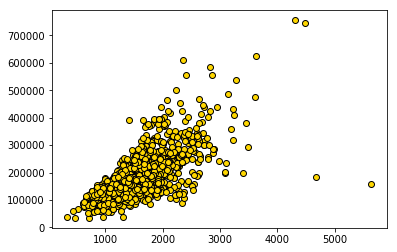

In [31]:
#GrLivArea is next most correlated (71%) variable 
plt.scatter(x=data['GrLivArea'],y=data['SalePrice'],color='gold',edgecolors='#000000')

Here we can clearly see outlier values in it so we need to remove it

In [32]:
data=data[data['GrLivArea']<4000]

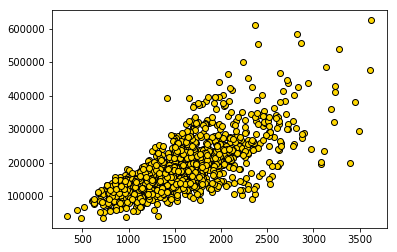

In [33]:
plt.scatter(x=data['GrLivArea'],y=data['SalePrice'],color='gold',edgecolors='#000000')

#### Scatter plot to see other highly corelated variables

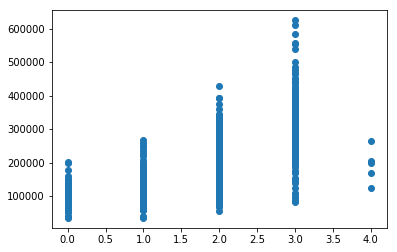

In [34]:
# GarageCars 
plt.scatter(x=data['GarageCars'],y=data['SalePrice'])


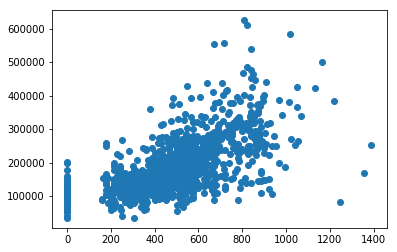

In [35]:
# GarageArea

plt.scatter(x=data['GarageArea'],y=data['SalePrice'])


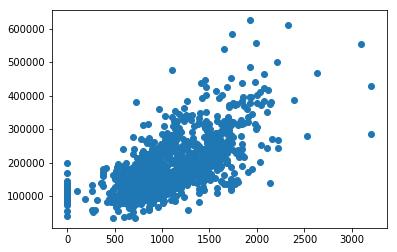

In [36]:
#TotalBsmtSF

plt.scatter(x=data['TotalBsmtSF'],y=data['SalePrice'])

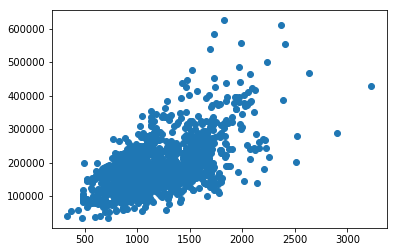

In [37]:
#1stFlrSF
plt.scatter(x=data['1stFlrSF'],y=data['SalePrice'])

### Target variable Distribution

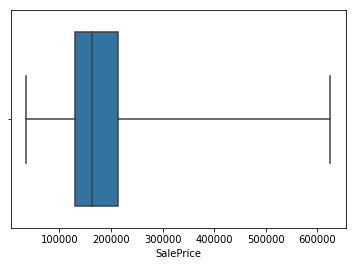

In [38]:
sns.boxplot(data['SalePrice'],whis=10)

### Derive New Feature

In [39]:
#Derive variable House Aging from (CurrentYear-YearBuilt)
import datetime
data['HouseAge']=datetime.datetime.now().year-data['YearBuilt']
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,No Pool,No Fence,None,0,2,2008,WD,Normal,208500,16
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,No Pool,No Fence,None,0,5,2007,WD,Normal,181500,43
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,No Pool,No Fence,None,0,9,2008,WD,Normal,223500,18
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000,104
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,No Pool,No Fence,None,0,12,2008,WD,Normal,250000,19


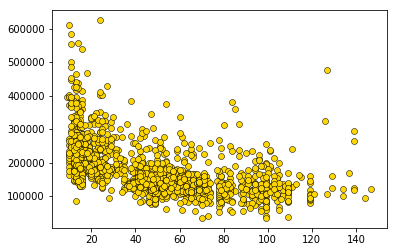

In [40]:
# HouseAge
plt.scatter(x=data['HouseAge'], y=data['SalePrice'], 
            color="gold", edgecolors="#000000", linewidths=0.5);

Here we can see decrease in sale price over increment of House Age. So old houses sold in less sale price than new houses

In [41]:
#Mapping Variables to numeric type
mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
data['BsmtQual'] = data['BsmtQual'].map(mp)
data['BsmtCond'] = data['BsmtCond'].map(mp)
data['BsmtExposure'] = data['BsmtExposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
data['BsmtFinType1'] = data['BsmtFinType1'].map(mp)
data['BsmtFinType2'] = data['BsmtFinType2'].map(mp)

mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
data['ExterQual'] = data['ExterQual'].map(mp)
data['ExterCond'] = data['ExterCond'].map(mp)
data['HeatingQC'] = data['HeatingQC'].map(mp)
data['KitchenQual'] = data['KitchenQual'].map(mp)


data['CentralAir'] = data['CentralAir'].map({'Y':1,'N':0})
data['Functional'] = data['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})



data['FireplaceQu'] = data['FireplaceQu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})

data['GarageFinish'] = data['GarageFinish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
data['GarageQual'] = data['GarageQual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
data['GarageCond'] =data['GarageCond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
data['PoolQC'] = data['PoolQC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
data['LandSlope'] = data['LandSlope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})

data['Fence'] = data['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

In [42]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [43]:
# split into X and y
X = data.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'HouseAge']]

y = list(data['SalePrice'])


### Dummy variable creation

In [44]:
obj_list = X.select_dtypes(include=['object'])
obj_list.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,None,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,...,MetalSd,None,CBlock,GasA,SBrkr,Attchd,Y,None,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,...,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,Y,None,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,None,WD,Normal


In [45]:
# Create dummy variables using the 'get_dummies' command
dummy_data=pd.get_dummies(obj_list,drop_first=True)
dummy_data.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
# Add the results to the master dataframe
data=pd.concat([data,dummy_data],axis=1)

In [47]:
# drop categorical variables 
X = X.drop(list(obj_list.columns), axis=1)

In [48]:
# concat dummy variables with X
X = pd.concat([X, dummy_data], axis=1)

In [49]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=205)

In [50]:
# split into train and test
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Model Building and Evaluation

### RFE (Recursive Feature Elimination)

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 28),
 ('LotFrontage', False, 145),
 ('LotArea', True, 1),
 ('LandSlope', False, 159),
 ('OverallQual', True, 1),
 ('OverallCond', False, 9),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 113),
 ('MasVnrArea', False, 7),
 ('ExterQual', True, 1),
 ('ExterCond', False, 41),
 ('BsmtQual', False, 20),
 ('BsmtCond', False, 19),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 137),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 172),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 109),
 ('CentralAir', False, 116),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 18),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 95),
 ('BsmtHalfBath', False, 129),
 ('FullBath', False, 32),
 ('HalfBath', False, 133),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Functional', False, 3),
 ('Fireplaces', False, 37),
 ('FireplaceQu

In [54]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'YearBuilt', 'ExterQual', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'PoolArea', 'PoolQC', 'HouseAge',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'Exterior1st_AsphShn', 'Exterior2nd_AsphShn',
       'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

In [55]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LandSlope', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=175)

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

Custom Function Definations For model fitting

In [57]:
# statmodel linear regression
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
def fit_LRM(X_train):
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [59]:
def getVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [60]:
lm=fit_LRM(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     331.8
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:18:01   Log-Likelihood:                -11733.
No. Observations:                1019   AIC:                         2.352e+04
Df Residuals:                     991   BIC:                         2.366e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.795e+

In [61]:
X_train1 = X_train_rfe.drop('PoolQC', axis=1)

In [62]:
lm1=fit_LRM(X_train1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     331.8
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:18:01   Log-Likelihood:                -11733.
No. Observations:                1019   AIC:                         2.352e+04
Df Residuals:                     991   BIC:                         2.366e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.796e+

In [63]:
X_train2 = X_train1.drop('BsmtUnfSF', axis=1)

In [64]:
lm2=fit_LRM(X_train2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     344.5
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:18:02   Log-Likelihood:                -11733.
No. Observations:                1019   AIC:                         2.352e+04
Df Residuals:                     992   BIC:                         2.365e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.796e+

In [65]:
X_train3 = X_train2.drop('GrLivArea', axis=1)

In [66]:
lm3=fit_LRM(X_train3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     358.1
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:18:02   Log-Likelihood:                -11734.
No. Observations:                1019   AIC:                         2.352e+04
Df Residuals:                     993   BIC:                         2.365e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.796e+

In [67]:
X_train4 = X_train3 .drop('PoolArea', axis=1)

In [68]:
lm4=fit_LRM(X_train4)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     372.2
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:18:02   Log-Likelihood:                -11736.
No. Observations:                1019   AIC:                         2.352e+04
Df Residuals:                     994   BIC:                         2.364e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.797e+

## Calculate the VIFs for the new model

In [69]:
getVIF(X_train4)

,Features,VIF
13,HouseAge,inf
2,YearBuilt,inf
22,Exterior2nd_AsphShn,524.160000
21,Exterior1st_AsphShn,524.020000
25,SaleCondition_Partial,87.300000
23,SaleType_New,86.900000
8,2ndFlrSF,5.690000
7,1stFlrSF,5.200000
12,TotRmsAbvGrd,5.030000
6,TotalBsmtSF,4.070000


In [70]:
X_train5 = X_train4 .drop(['HouseAge'], axis=1)

In [71]:
getVIF(X_train5)

,Features,VIF
21,Exterior2nd_AsphShn,524.16
20,Exterior1st_AsphShn,524.02
24,SaleCondition_Partial,87.30
22,SaleType_New,86.90
8,2ndFlrSF,5.69
7,1stFlrSF,5.20
12,TotRmsAbvGrd,5.03
6,TotalBsmtSF,4.07
19,HouseStyle_1Story,3.45
1,OverallQual,3.37


In [72]:
X_train5=X_train5.drop('Exterior2nd_AsphShn',axis=1)


In [73]:
getVIF(X_train5)

,Features,VIF
23,SaleCondition_Partial,87.19
21,SaleType_New,86.81
8,2ndFlrSF,5.69
7,1stFlrSF,5.20
12,TotRmsAbvGrd,5.03
6,TotalBsmtSF,4.07
19,HouseStyle_1Story,3.45
1,OverallQual,3.37
3,ExterQual,3.15
9,BedroomAbvGr,2.47


In [74]:
X_train5=X_train5.drop('SaleCondition_Partial',axis=1)


In [75]:
getVIF(X_train5)

,Features,VIF
8,2ndFlrSF,5.67
7,1stFlrSF,5.20
12,TotRmsAbvGrd,5.03
6,TotalBsmtSF,4.07
19,HouseStyle_1Story,3.45
1,OverallQual,3.36
3,ExterQual,3.14
9,BedroomAbvGr,2.46
11,KitchenQual,2.38
21,SaleType_New,2.20


In [76]:
X_train5=X_train5.drop('2ndFlrSF',axis=1)

In [77]:
getVIF(X_train5)

,Features,VIF
7,1stFlrSF,4.46
6,TotalBsmtSF,4.07
11,TotRmsAbvGrd,3.88
1,OverallQual,3.26
3,ExterQual,3.10
18,HouseStyle_1Story,2.45
8,BedroomAbvGr,2.43
10,KitchenQual,2.38
20,SaleType_New,2.20
2,YearBuilt,2.16


# Ridge Regression

In [78]:
# list of alphas to tune
params = {'alpha':  [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ,500,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train5, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004403,0.001358,0.001601,0.000490,0.0001,{'alpha': 0.0001},-22507.078625,-20136.359111,-21212.020859,-19765.503140,...,-20675.851641,1059.453941,26,-19385.985530,-20316.239620,-20144.895746,-20415.630194,-20430.195880,-20138.589394,389.819932
1,0.004604,0.001745,0.001201,0.000401,0.001,{'alpha': 0.001},-22507.076447,-20136.348217,-21212.014214,-19765.501382,...,-20675.846109,1059.455000,25,-19385.982571,-20316.235236,-20144.891238,-20415.626149,-20430.192961,-20138.585631,389.819648
2,0.004806,0.001468,0.001398,0.000492,0.01,{'alpha': 0.01},-22507.054667,-20136.239281,-21211.947766,-19765.483803,...,-20675.790792,1059.465589,24,-19385.952990,-20316.191394,-20144.846159,-20415.585696,-20430.163773,-20138.548002,389.816812
3,0.005804,0.001834,0.001401,0.000491,0.05,{'alpha': 0.05},-22506.957861,-20135.755226,-21211.652502,-19765.405660,...,-20675.544976,1059.512651,23,-19385.821530,-20315.996564,-20144.645825,-20415.405924,-20430.034066,-20138.380782,389.804210
4,0.006405,0.002246,0.001601,0.000490,0.1,{'alpha': 0.1},-22506.836841,-20135.150400,-21211.283555,-19765.307949,...,-20675.237796,1059.571475,22,-19385.657241,-20315.753075,-20144.395453,-20415.181252,-20429.871962,-20138.171796,389.788462


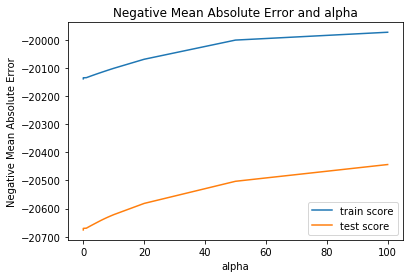

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [82]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.00469439e+03,  8.99100206e+02,  5.86086996e+03, -3.09356178e+02,
        1.01880370e+04,  4.74291835e+03,  2.78507414e+03,  1.17776722e+03,
        3.96461515e+03,  5.14873448e+03, -1.52490186e+03,  3.64646084e+03,
       -1.86163550e+03,  5.28456677e+03, -4.74354061e+02,  7.34898588e+03,
       -6.58653306e+01,  4.68384076e+02, -1.46521480e+03,  6.28325378e+03,
       -1.94578968e+02,  4.31252351e+01,  9.20313964e+03,  8.17760093e+03,
       -6.55430130e+01,  1.39377066e+04,  1.13062285e+03, -8.17570012e+02,
       -4.00773095e+02,  9.58479725e+02, -3.94759935e+03, -2.60243910e+03,
        4.12165699e+03,  4.25416662e+03,  3.80916255e+03,  1.99311299e+03,
       -4.67676118e+01, -1.62066722e+03,  1.87081322e+02,  3.39493741e+03,
        3.15586987e+03,  1.16806001e+03, -5.40765994e+02,  1.29294550e+03,
        2.68434483e+03,  9.26090344e+02,  1.37505803e+03,  1.30416555e+03,
       -4.24387157e+02, -7.46851090e+02, -3.70907463e+02,  1.79945722e+02,
       -1.07603934e+03,  

In [85]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180327.66),
 ('MSSubClass', -4004.694),
 ('LotFrontage', 899.1),
 ('LotArea', 5860.87),
 ('LandSlope', -309.356),
 ('OverallQual', 10188.037),
 ('OverallCond', 4742.918),
 ('YearBuilt', 2785.074),
 ('YearRemodAdd', 1177.767),
 ('MasVnrArea', 3964.615),
 ('ExterQual', 5148.734),
 ('ExterCond', -1524.902),
 ('BsmtQual', 3646.461),
 ('BsmtCond', -1861.635),
 ('BsmtExposure', 5284.567),
 ('BsmtFinType1', -474.354),
 ('BsmtFinSF1', 7348.986),
 ('BsmtFinType2', -65.865),
 ('BsmtFinSF2', 468.384),
 ('BsmtUnfSF', -1465.215),
 ('TotalBsmtSF', 6283.254),
 ('HeatingQC', -194.579),
 ('CentralAir', 43.125),
 ('1stFlrSF', 9203.14),
 ('2ndFlrSF', 8177.601),
 ('LowQualFinSF', -65.543),
 ('GrLivArea', 13937.707),
 ('BsmtFullBath', 1130.623),
 ('BsmtHalfBath', -817.57),
 ('FullBath', -400.773),
 ('HalfBath', 958.48),
 ('BedroomAbvGr', -3947.599),
 ('KitchenAbvGr', -2602.439),
 ('KitchenQual', 4121.657),
 ('TotRmsAbvGrd', 4254.167),
 ('Functional', 3809.163),
 ('Fireplaces', 1993.113),
 ('F

# Lasso

In [86]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train5, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007405,0.001856,0.001401,0.000490,0.0001,{'alpha': 0.0001},-22507.078840,-20136.360279,-21212.021597,-19765.503300,...,-20675.852223,1059.453835,27,-19385.985842,-20316.240075,-20144.896220,-20415.630619,-20430.196187,-20138.589789,389.819961
1,0.006604,0.001020,0.001201,0.000400,0.001,{'alpha': 0.001},-22507.078589,-20136.359882,-21212.021584,-19765.502973,...,-20675.851920,1059.453935,26,-19385.985695,-20316.239785,-20144.895968,-20415.630370,-20430.196030,-20138.589570,389.819932
2,0.005003,0.001096,0.001201,0.000400,0.01,{'alpha': 0.01},-22507.076773,-20136.356579,-21212.021760,-19765.499737,...,-20675.849276,1059.455093,25,-19385.984320,-20316.237271,-20144.893838,-20415.627853,-20430.195122,-20138.587681,389.819733
3,0.005203,0.000749,0.001001,0.000001,0.05,{'alpha': 0.05},-22507.066244,-20136.339618,-21212.021779,-19765.485494,...,-20675.836176,1059.459765,24,-19385.977824,-20316.224609,-20144.883040,-20415.618876,-20430.188412,-20138.578552,389.818772
4,0.005403,0.001357,0.001401,0.000490,0.1,{'alpha': 0.1},-22507.052371,-20136.318056,-21212.021393,-19765.467618,...,-20675.819523,1059.465336,23,-19385.969564,-20316.208644,-20144.869238,-20415.605200,-20430.179741,-20138.566477,389.817221


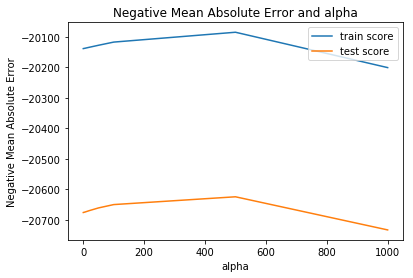

In [89]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [90]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
lasso.coef_

array([-4.98680218e+03,  7.01756968e+02,  4.85550171e+03, -0.00000000e+00,
        1.25291052e+04,  3.80063003e+03,  7.66725550e+02,  1.14876689e+03,
        3.58500216e+03,  5.68333016e+03, -1.19549533e+03,  2.24093248e+03,
       -1.22077408e+03,  5.32968455e+03,  0.00000000e+00,  8.59080610e+03,
        0.00000000e+00,  3.92816054e+02, -0.00000000e+00,  4.95005536e+03,
        0.00000000e+00, -0.00000000e+00,  9.34261324e+02,  0.00000000e+00,
       -8.66702767e+02,  2.72977953e+04,  9.78135603e+02, -5.12074674e+02,
       -0.00000000e+00,  5.49526973e+02, -3.67425205e+03, -2.42297625e+03,
        4.23919782e+03,  2.27688994e+03,  3.48872322e+03,  1.52289782e+03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.51002618e+03,
        3.06098776e+03, -0.00000000e+00, -0.00000000e+00,  8.34266928e+02,
        2.18948221e+03,  0.00000000e+00,  3.90281042e+02,  6.12397164e+02,
       -0.00000000e+00, -8.44623523e+02, -1.95707065e+02,  0.00000000e+00,
       -3.93285364e+02,  

In [92]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180293.982),
 ('MSSubClass', -4986.802),
 ('LotFrontage', 701.757),
 ('LotArea', 4855.502),
 ('LandSlope', -0.0),
 ('OverallQual', 12529.105),
 ('OverallCond', 3800.63),
 ('YearBuilt', 766.726),
 ('YearRemodAdd', 1148.767),
 ('MasVnrArea', 3585.002),
 ('ExterQual', 5683.33),
 ('ExterCond', -1195.495),
 ('BsmtQual', 2240.932),
 ('BsmtCond', -1220.774),
 ('BsmtExposure', 5329.685),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 8590.806),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 392.816),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 4950.055),
 ('HeatingQC', 0.0),
 ('CentralAir', -0.0),
 ('1stFlrSF', 934.261),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -866.703),
 ('GrLivArea', 27297.795),
 ('BsmtFullBath', 978.136),
 ('BsmtHalfBath', -512.075),
 ('FullBath', -0.0),
 ('HalfBath', 549.527),
 ('BedroomAbvGr', -3674.252),
 ('KitchenAbvGr', -2422.976),
 ('KitchenQual', 4239.198),
 ('TotRmsAbvGrd', 2276.89),
 ('Functional', 3488.723),
 ('Fireplaces', 1522.898),
 ('FireplaceQu', 0.0),
 ('GarageYrBl